In [60]:
import jsonlines

# Path to the JL files
dev_path = 'C:/Users/nikhil/PESU/Capstone/Data/SMHD/SMHDv1.1/devClean.jl'
test_path = 'C:/Users/nikhil/PESU/Capstone/Data/SMHD/SMHDv1.1/testClean.jl'
train_path = 'C:/Users/nikhil/PESU/Capstone/Data/SMHD/SMHDv1.1/trainClean.jl'

# 1. Total number of users

In [58]:
def total_num_of_users(file_path):
    num_users = 0

    with jsonlines.open(file_path) as reader:
        for _ in reader:
            num_users += 1

    print(f"Number of users : {num_users}")

### (i) Dev.jl 

In [59]:
total_num_of_users(dev_path)

Number of users : 99170


### (ii) test.jl 

In [61]:
total_num_of_users(test_path)

Number of users : 101295


### (iii) train.jl 

In [62]:
total_num_of_users(train_path)

Number of users : 99502


# 2. Number of users per disorder 

In [30]:
from collections import Counter

In [54]:
def users_per_dissorder(file_path):
    count = Counter()
    with jsonlines.open(file_path) as reader:
        for line in reader:
            labels = line['label']
            for disorder in labels:
                count[disorder] += 1

    for disorder, user_count in count.items():
        print(f"Disorder: {disorder}, User Count: {user_count}")

### (i) Dev.jl 

In [55]:
users_per_dissorder(dev_path)

Disorder: control, User Count: 92421
Disorder: bipolar, User Count: 1182
Disorder: depression, User Count: 2574
Disorder: adhd, User Count: 1747
Disorder: anxiety, User Count: 1593
Disorder: eating, User Count: 115
Disorder: ptsd, User Count: 516
Disorder: autism, User Count: 480
Disorder: ocd, User Count: 477
Disorder: schizophrenia, User Count: 278


### (ii) test.jl 

In [56]:
users_per_dissorder(test_path)

Disorder: control, User Count: 94415
Disorder: adhd, User Count: 1779
Disorder: bipolar, User Count: 1247
Disorder: ptsd, User Count: 558
Disorder: depression, User Count: 2611
Disorder: anxiety, User Count: 1675
Disorder: schizophrenia, User Count: 267
Disorder: ocd, User Count: 390
Disorder: eating, User Count: 112
Disorder: autism, User Count: 517


### (iii) train.jl 

In [57]:
users_per_dissorder(train_path)

Disorder: control, User Count: 92725
Disorder: anxiety, User Count: 1711
Disorder: bipolar, User Count: 1216
Disorder: depression, User Count: 2662
Disorder: ptsd, User Count: 528
Disorder: adhd, User Count: 1768
Disorder: autism, User Count: 479
Disorder: schizophrenia, User Count: 238
Disorder: ocd, User Count: 409
Disorder: eating, User Count: 104


# 3. Pie Chart 

In [40]:
import matplotlib.pyplot as plt

In [50]:
def plot_pie_charts(file_path):
    label_counter = Counter()
    # Open the JL file for reading and count the occurrences of each label
    with jsonlines.open(file_path) as reader:
        for line in reader:
            labels = line['label']
            if isinstance(labels, list):
                label_counter.update(labels)

    # Extract labels and counts for the pie chart
    all_labels = list(label_counter.keys())
    all_counts = list(label_counter.values())
    
    # Plotting two pie charts side by side
    plt.figure(figsize=(15, 6))

    # Plotting the pie chart with all labels
    plt.subplot(1, 2, 1)  # Subplot 1
    plt.pie(all_counts, labels=all_labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Distribution of Mental Health Disorders (Including "control")')

    # Plotting the pie chart without the "control" label
    plt.subplot(1, 2, 2)  # Subplot 2
    without_control_labels = [label for label in all_labels if label != 'control']
    without_control_counts = [label_counter[label] for label in without_control_labels]
    plt.pie(without_control_counts, labels=without_control_labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Distribution of Mental Health Disorders (Excluding "control")')
    
    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()

### (i) Dev.jl 

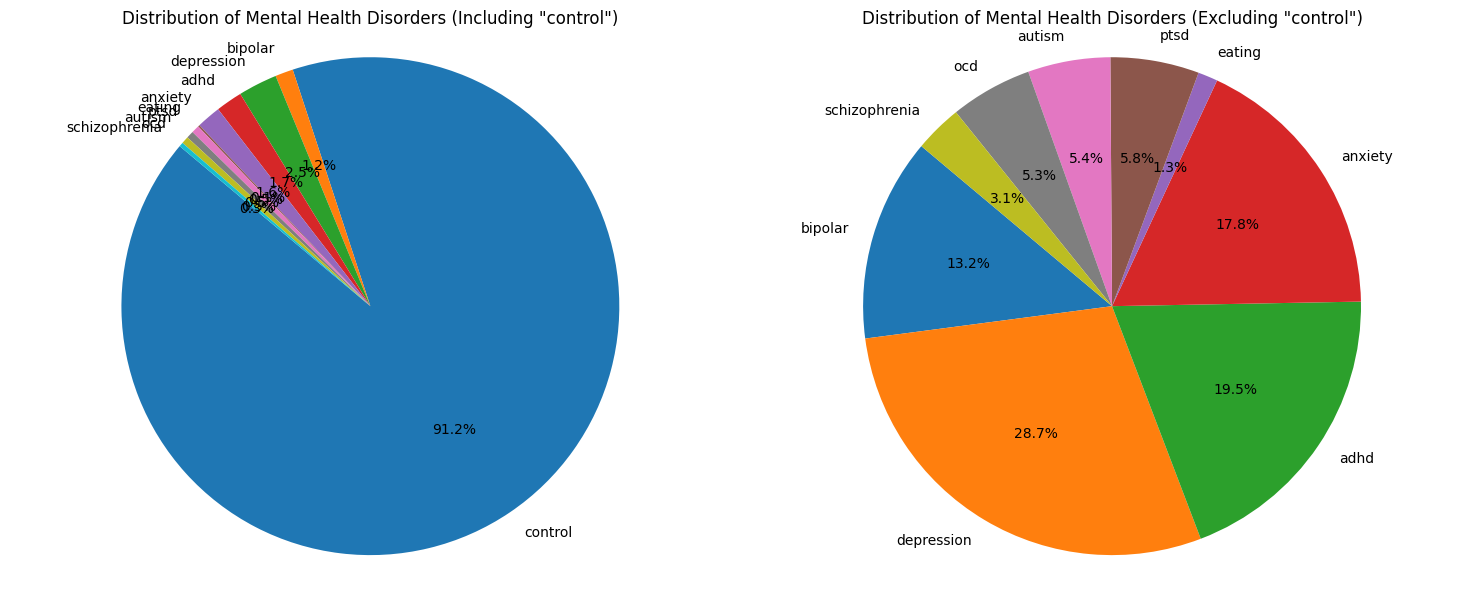

In [51]:
plot_pie_charts(dev_path)

### (ii) test.jl 

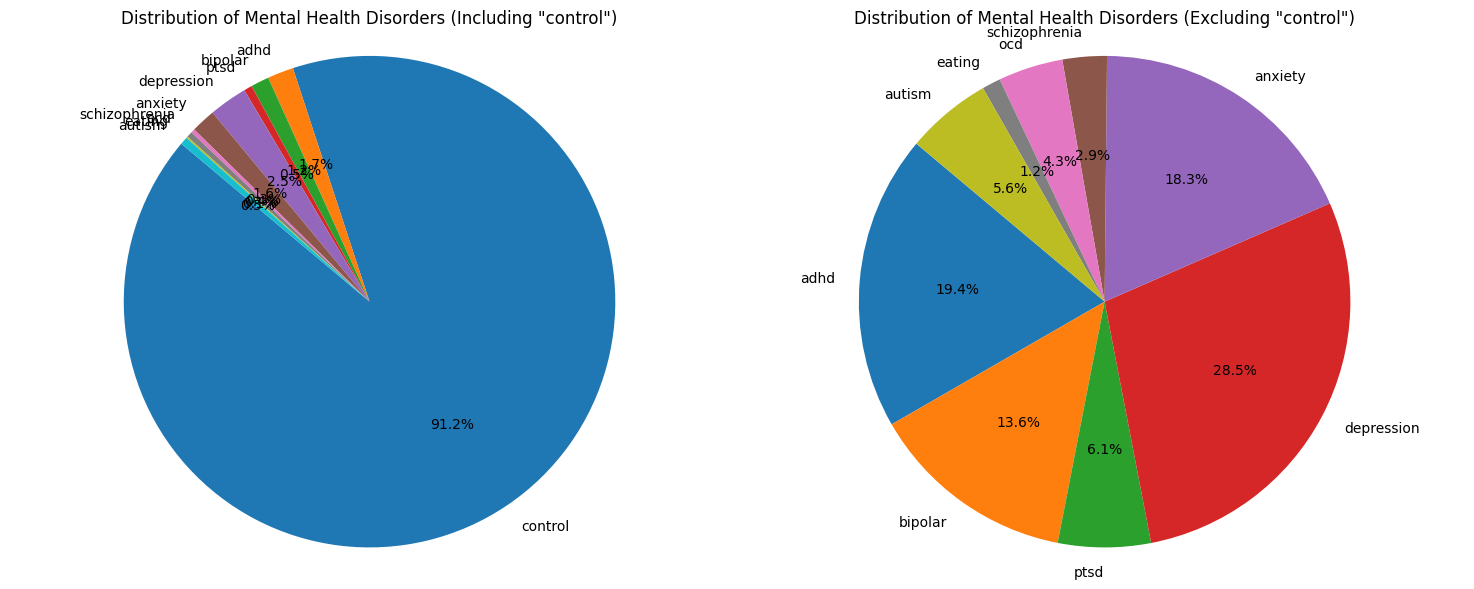

In [52]:
plot_pie_charts(test_path)

### (iii) train.jl 

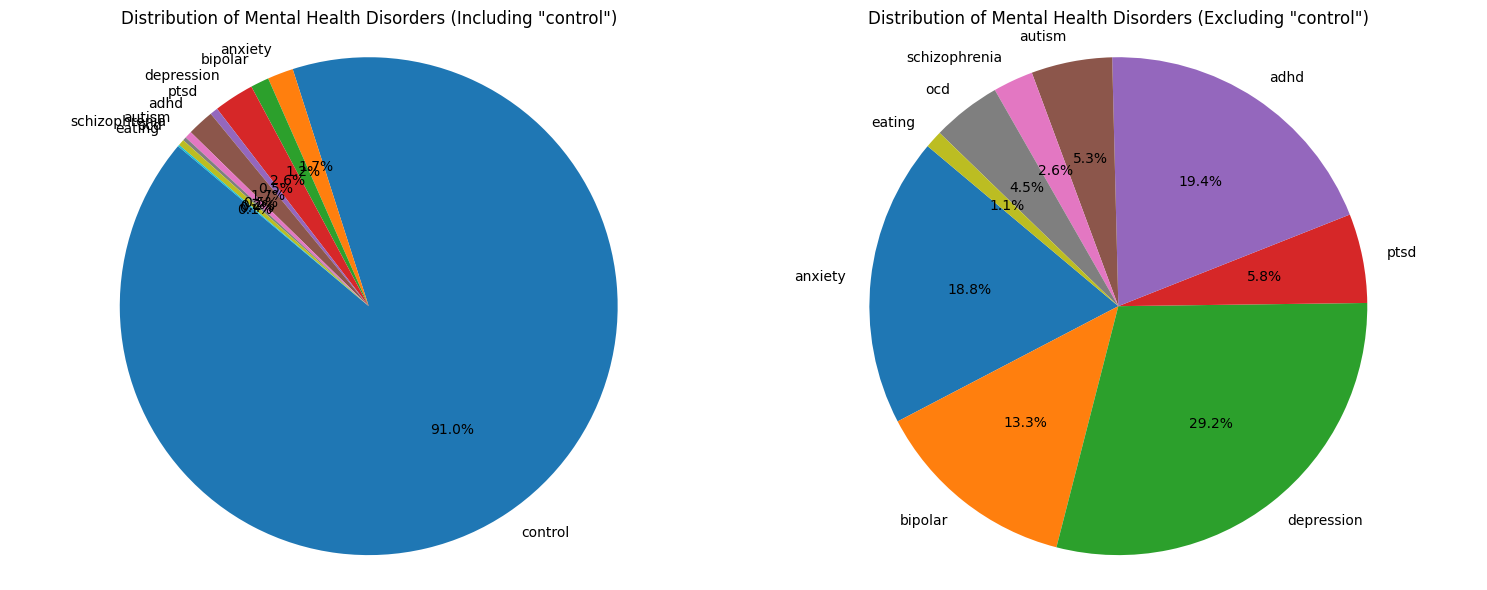

In [53]:
plot_pie_charts(train_path)